### Download dataset from kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install kaggle -q

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp /content/drive/MyDrive/Colab/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download iammustafatz/diabetes-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
License(s): copyright-authors
  0% 0.00/734k [00:00<?, ?B/s]
100% 734k/734k [00:00<00:00, 1.09GB/s]


In [ ]:
! unzip diabetes-prediction-dataset.zip

Archive:  diabetes-prediction-dataset.zip
  inflating: diabetes_prediction_dataset.csv  


In [ ]:
! rm -rf diabetes-prediction-dataset.zip

### Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read data and some details

In [ ]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [ ]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [ ]:
df.duplicated().sum()

np.int64(3854)

In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
df.nunique()

,0
gender,3
age,102
hypertension,2
heart_disease,2
smoking_history,6
bmi,4247
HbA1c_level,18
blood_glucose_level,18
diabetes,2


In [ ]:
for col in df.columns:
  print(f'{col}: {df[col].unique()}')

gender: ['Female' 'Male' 'Other']
age: [80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]
hypertension: [0 1]
heart_disease: [1 0]
smoking_history: ['never' 'No Info' 'current' 'former' 'ever' 'not current']
bmi: [25.19 27.32 23.45 ... 59.42 44.39 60.52]
HbA1c_level: [6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 6.2 4.  4.5 9.  7.  8.8 8.2 7.5 6.8]
blood_glucose_level: [140  80 158 155  85 200 145 100 130 160 126 159  90 260 220 300 280 240]
di

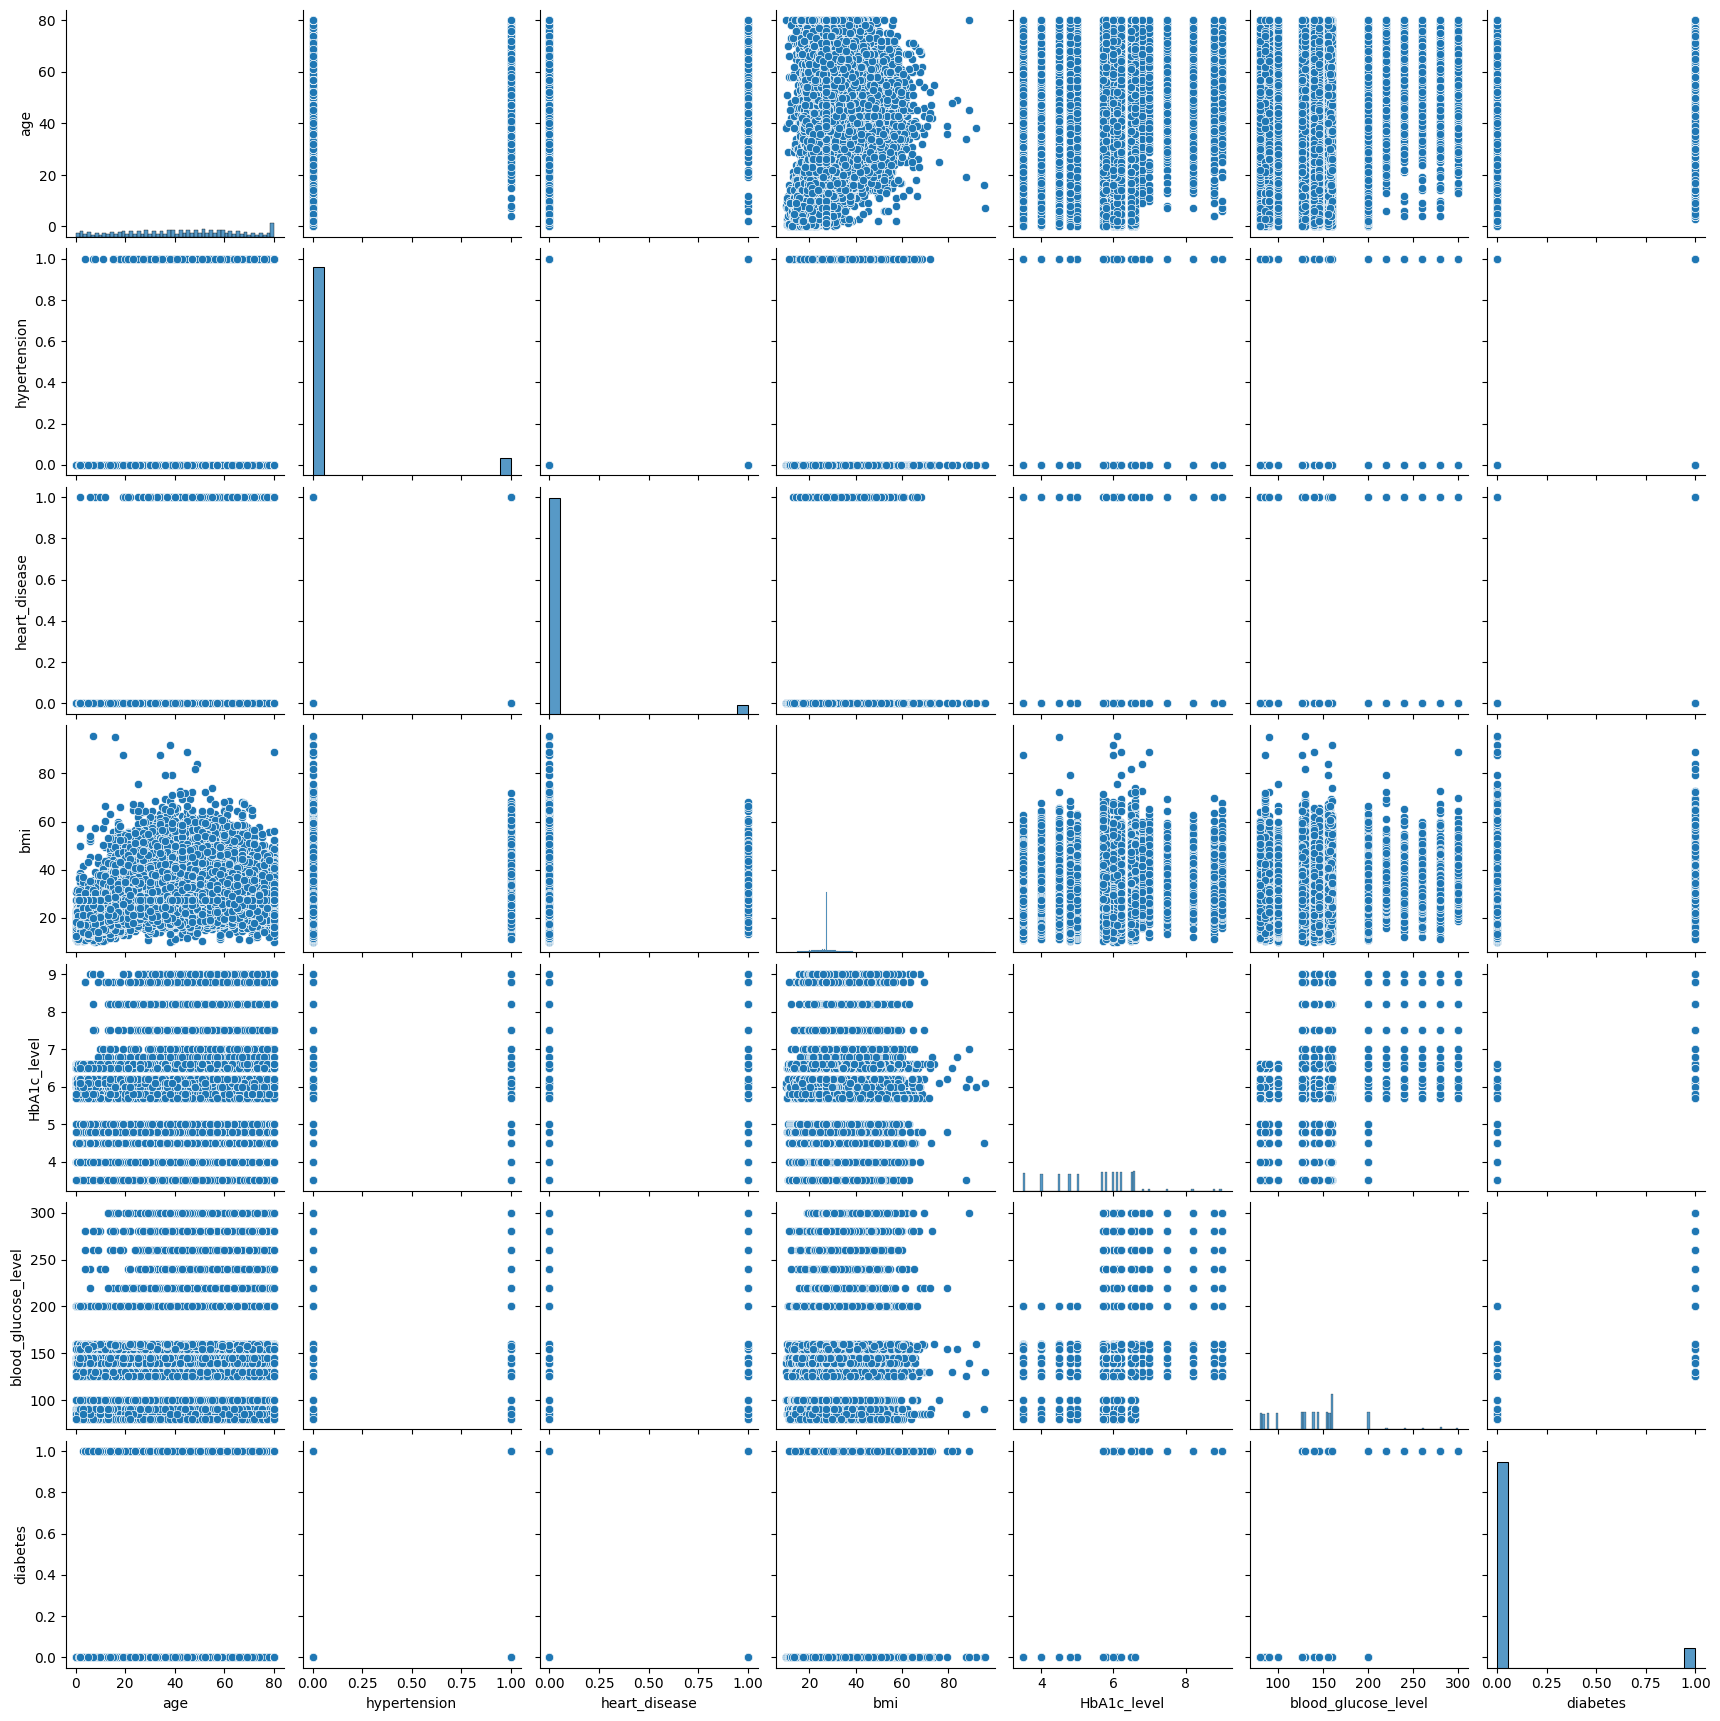

In [ ]:
sns.pairplot(df)

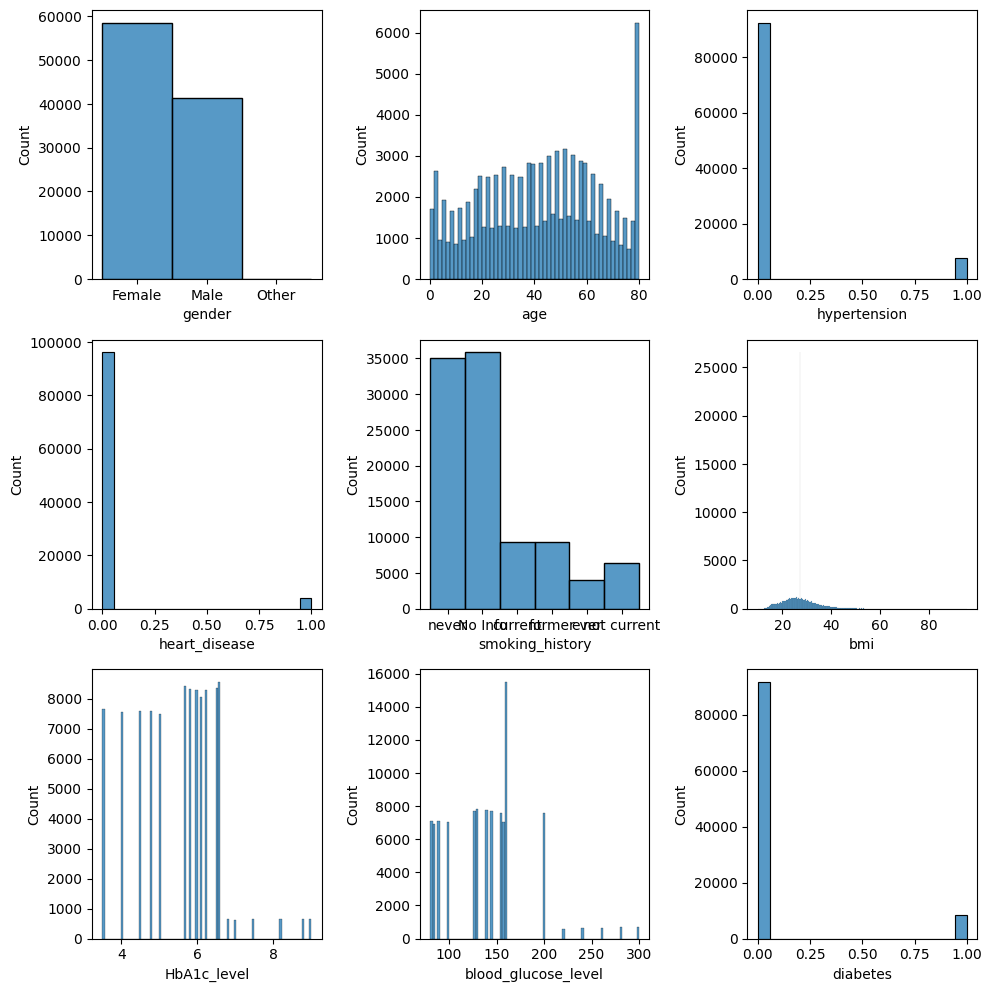

In [ ]:
fig , axs = plt.subplots(3 , 3 , figsize = (10 , 10))
index = 0
axs = axs.flatten()
for col , value in df.items():
  sns.histplot(value , ax = axs[index])
  index += 1
plt.tight_layout(pad = 1.0)

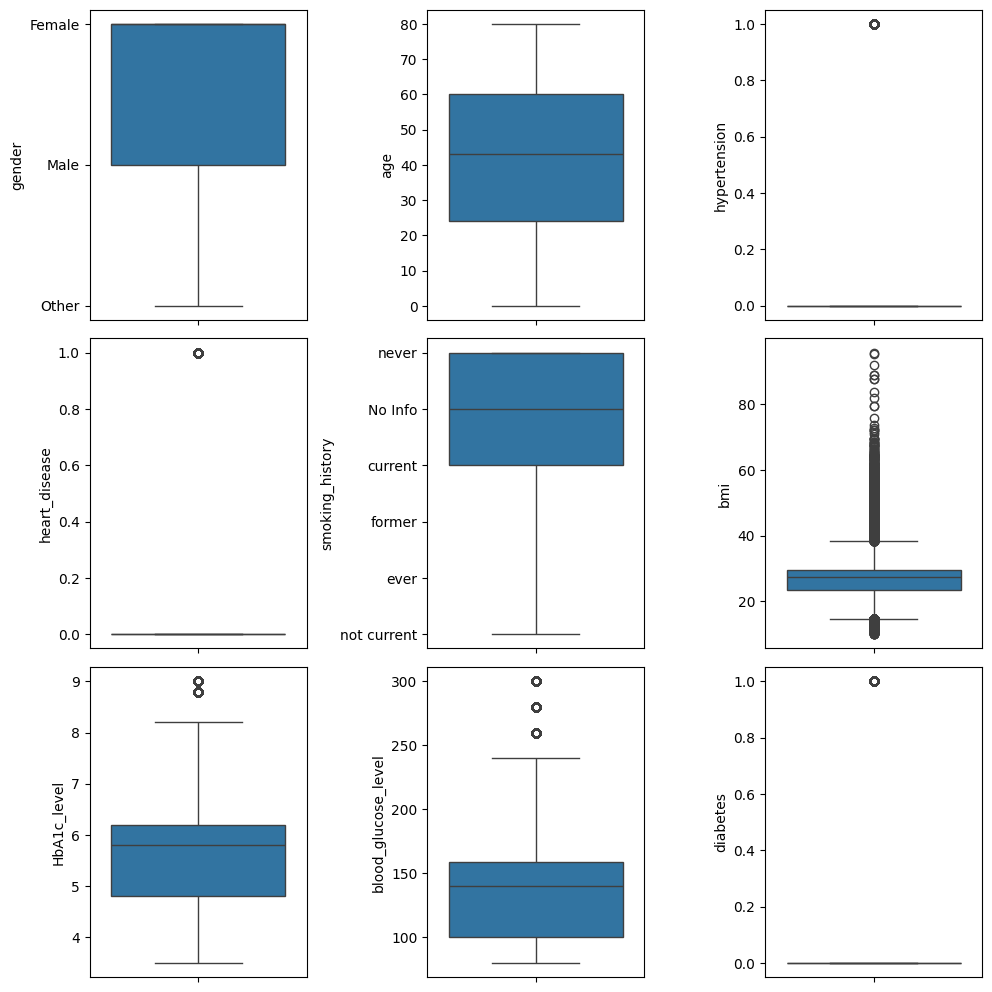

In [ ]:
fig , axs = plt.subplots(3 , 3 , figsize = (10 , 10))
index = 0
axs = axs.flatten()
for col , value in df.items():
  sns.boxplot(y = value , ax = axs[index])
  index += 1
plt.tight_layout(pad = 1.0)

In [ ]:
len(df[df['gender'] == 'Other'])

18

In [ ]:
len(df[df['smoking_history'] == 'No Info'])

35816

In [ ]:
len(df[df['bmi'] > 60])

115

# 4 method preprocessing

### Method #1

In [ ]:
data1 = df.copy()
y1 = df['diabetes']
data1.drop('diabetes' , axis = 1 , inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
lbl_enc = LabelEncoder()
ohe_enc = OneHotEncoder()

In [ ]:
data1['gender'] = lbl_enc.fit_transform(data1['gender'])
data1['gender'].unique()

array([0, 1, 2])

In [ ]:
temp = ohe_enc.fit_transform(data1[['smoking_history']])
temp = pd.DataFrame(temp.toarray() , columns = ohe_enc.get_feature_names_out())
temp.head()

,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
data1.drop('smoking_history' , axis = 1 , inplace = True)

In [ ]:
col = list(np.concatenate((data1.columns , temp.columns)))

data1 = np.concatenate((data1 , temp) , axis = 1)
data1 = pd.DataFrame(data1 , columns = col)
data1.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0.0,80.0,0.0,1.0,25.19,6.6,140.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,54.0,0.0,0.0,27.32,6.6,80.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,28.0,0.0,0.0,27.32,5.7,158.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,36.0,0.0,0.0,23.45,5.0,155.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,76.0,1.0,1.0,20.14,4.8,155.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
temp = scaler.fit_transform(data1)
data1 = pd.DataFrame(temp , columns = data1.columns)
data1.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0.0,1.000000,0.0,1.0,0.177171,0.563636,0.272727,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.674675,0.0,0.0,0.202031,0.563636,0.000000,1.0,0.0,0.0,0.0,0.0,0.0
2,0.5,0.349349,0.0,0.0,0.202031,0.400000,0.354545,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.449449,0.0,0.0,0.156863,0.272727,0.340909,0.0,1.0,0.0,0.0,0.0,0.0
4,0.5,0.949950,1.0,1.0,0.118231,0.236364,0.340909,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
x1_train , x1_test , y1_train , y1_test = train_test_split(data1 , y1 , test_size = 0.3 , random_state = 17)

### Method #2


In [ ]:
data2 = df.copy()

In [ ]:
data2 = data2[data2['bmi'] < 60]
data2 = data2[data2['gender'] != 'Other']

In [ ]:
y2 = data2['diabetes']
data2.drop('diabetes' , axis = 1 , inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
lbl_enc = LabelEncoder()
ohe_enc = OneHotEncoder()

In [ ]:
data2['gender'] = lbl_enc.fit_transform(data2['gender'])
data2['gender'].unique()

array([0, 1])

In [ ]:
temp = ohe_enc.fit_transform(data2[['smoking_history']])
temp = pd.DataFrame(temp.toarray() , columns = ohe_enc.get_feature_names_out())
temp.head()

,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
data2.drop('smoking_history' , axis = 1 , inplace = True)

In [ ]:
col = list(np.concatenate((data2.columns , temp.columns)))

data2 = np.concatenate((data2 , temp) , axis = 1)
data2 = pd.DataFrame(data2 , columns = col)
data2.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0.0,80.0,0.0,1.0,25.19,6.6,140.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,54.0,0.0,0.0,27.32,6.6,80.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,28.0,0.0,0.0,27.32,5.7,158.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,36.0,0.0,0.0,23.45,5.0,155.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,76.0,1.0,1.0,20.14,4.8,155.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
temp = scaler.fit_transform(data2)
data2 = pd.DataFrame(temp , columns = data2.columns)
data2.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0.0,1.000000,0.0,1.0,0.303721,0.563636,0.272727,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.674675,0.0,0.0,0.346339,0.563636,0.000000,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.349349,0.0,0.0,0.346339,0.400000,0.354545,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.449449,0.0,0.0,0.268908,0.272727,0.340909,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.949950,1.0,1.0,0.202681,0.236364,0.340909,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
x2_train , x2_test , y2_train , y2_test = train_test_split(data2 , y2 , test_size = 0.3 , random_state = 17)

### Method #3

In [ ]:
data3 = df.copy()

In [ ]:
data3['smoking_history'].replace('No Info' , np.nan , inplace = True)
data3.isna().sum()

/tmp/ipython-input-3783255817.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data3['smoking_history'].replace('No Info' , np.nan , inplace = True)


,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,35816
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [ ]:
y3 = data3['diabetes']
data3.drop('diabetes' , axis = 1 , inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , OrdinalEncoder
lbl_enc = LabelEncoder()
ohe_enc = OneHotEncoder()
ord_enc = OrdinalEncoder()

In [ ]:
data3['gender'] = lbl_enc.fit_transform(data3['gender'])
data3['gender'].unique()

array([0, 1, 2])

In [ ]:
data3['smoking_history'] = ord_enc.fit_transform(data3[['smoking_history']])
data3['smoking_history'].unique()

array([ 3., nan,  0.,  2.,  1.,  4.])

In [ ]:
col = data3.columns

In [ ]:
from sklearn.impute import KNNImputer
knn_imp = KNNImputer(n_neighbors = 5)
data3 = knn_imp.fit_transform(data3)
data3 = pd.DataFrame(data3 , columns = col)
data3.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0.0,80.0,0.0,1.0,3.0,25.19,6.6,140.0
1,0.0,54.0,0.0,0.0,2.2,27.32,6.6,80.0
2,1.0,28.0,0.0,0.0,3.0,27.32,5.7,158.0
3,0.0,36.0,0.0,0.0,0.0,23.45,5.0,155.0
4,1.0,76.0,1.0,1.0,0.0,20.14,4.8,155.0


In [ ]:
data3['smoking_history'].unique()

array([3. , 2.2, 0. , 2.8, 2. , 1. , 4. , 1.4, 3.2, 2.4, 2.6, 1.8, 3.4,
       3.6, 0.8, 1.2, 1.6, 0.4, 0.6, 3.8, 0.2])

In [ ]:
#for i in range(len(data3)) :
#    data3['smoking_history'][i] = np.round(data3['smoking_history'][i])

data3['smoking_history'] = data3['smoking_history'].round()

In [ ]:
data3['smoking_history'].unique()

array([3., 2., 0., 1., 4.])

In [ ]:
temp = ord_enc.inverse_transform(data3[['smoking_history']])
temp = pd.DataFrame(temp , columns = ['smoking_history'])
temp.head()

,smoking_history
0,never
1,former
2,never
3,current
4,current


In [ ]:
data3['smoking_history'] = temp['smoking_history']
data3['smoking_history'].unique()

array(['never', 'former', 'current', 'ever', 'not current'], dtype=object)

In [ ]:
data3.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0.0,80.0,0.0,1.0,never,25.19,6.6,140.0
1,0.0,54.0,0.0,0.0,former,27.32,6.6,80.0
2,1.0,28.0,0.0,0.0,never,27.32,5.7,158.0
3,0.0,36.0,0.0,0.0,current,23.45,5.0,155.0
4,1.0,76.0,1.0,1.0,current,20.14,4.8,155.0


In [ ]:
temp = ohe_enc.fit_transform(data3[['smoking_history']])
temp = pd.DataFrame(temp.toarray() , columns = ohe_enc.get_feature_names_out())
temp.head()

,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [ ]:
data3.drop('smoking_history' , axis = 1 , inplace = True)

In [ ]:
col = list(np.concatenate((data3.columns , temp.columns)))

data3 = np.concatenate((data3 , temp) , axis = 1)
data3 = pd.DataFrame(data3 , columns = col)
data3.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0.0,80.0,0.0,1.0,25.19,6.6,140.0,0.0,0.0,0.0,1.0,0.0
1,0.0,54.0,0.0,0.0,27.32,6.6,80.0,0.0,0.0,1.0,0.0,0.0
2,1.0,28.0,0.0,0.0,27.32,5.7,158.0,0.0,0.0,0.0,1.0,0.0
3,0.0,36.0,0.0,0.0,23.45,5.0,155.0,1.0,0.0,0.0,0.0,0.0
4,1.0,76.0,1.0,1.0,20.14,4.8,155.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data3 = pd.DataFrame(scaler.fit_transform(data3) , columns = data3.columns)
data3.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0.0,1.000000,0.0,1.0,0.177171,0.563636,0.272727,0.0,0.0,0.0,1.0,0.0
1,0.0,0.674675,0.0,0.0,0.202031,0.563636,0.000000,0.0,0.0,1.0,0.0,0.0
2,0.5,0.349349,0.0,0.0,0.202031,0.400000,0.354545,0.0,0.0,0.0,1.0,0.0
3,0.0,0.449449,0.0,0.0,0.156863,0.272727,0.340909,1.0,0.0,0.0,0.0,0.0
4,0.5,0.949950,1.0,1.0,0.118231,0.236364,0.340909,1.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
x3_train , x3_test , y3_train , y3_test = train_test_split(data3 , y3 , test_size = 0.3 , random_state = 17)

### Method #4

In [ ]:
data4 = df.copy()

In [ ]:
data4 = data4[data4['bmi'] < 60]
data4 = data4[data4['gender'] != 'Other']
data4['smoking_history'].replace('No Info' , np.nan , inplace = True)
data4.isna().sum()

/tmp/ipython-input-4126411909.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data4['smoking_history'].replace('No Info' , np.nan , inplace = True)


,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,35781
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [ ]:
y4 = data4['diabetes']
data4.drop('diabetes' , axis = 1 , inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , OrdinalEncoder
lbl_enc = LabelEncoder()
ohe_enc = OneHotEncoder()
ord_enc = OrdinalEncoder()

In [ ]:
data4['gender'] = lbl_enc.fit_transform(data4['gender'])
data4['gender'].unique()

array([0, 1])

In [ ]:
data4['smoking_history'] = ord_enc.fit_transform(data4[['smoking_history']])
data4['smoking_history'].unique()

array([ 3., nan,  0.,  2.,  1.,  4.])

In [ ]:
col = data4.columns

In [ ]:
from sklearn.impute import KNNImputer
knn_imp = KNNImputer(n_neighbors = 5)
data4 = knn_imp.fit_transform(data4)
data4 = pd.DataFrame(data4 , columns = col)
data4.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0.0,80.0,0.0,1.0,3.0,25.19,6.6,140.0
1,0.0,54.0,0.0,0.0,2.2,27.32,6.6,80.0
2,1.0,28.0,0.0,0.0,3.0,27.32,5.7,158.0
3,0.0,36.0,0.0,0.0,0.0,23.45,5.0,155.0
4,1.0,76.0,1.0,1.0,0.0,20.14,4.8,155.0


In [ ]:
data4['smoking_history'].unique()

array([3. , 2.2, 0. , 2.8, 2. , 1. , 4. , 1.4, 3.2, 2.4, 2.6, 1.8, 3.4,
       3.6, 1.2, 1.6, 0.4, 0.8, 0.6, 3.8, 0.2])

In [ ]:
#for i in range(len(data4)) :
#    data4['smoking_history'][i] = np.round(data4['smoking_history'][i])

data4['smoking_history'] = data4['smoking_history'].round()

In [ ]:
data4['smoking_history'].unique()

array([3., 2., 0., 1., 4.])

In [ ]:
temp = ord_enc.inverse_transform(data4[['smoking_history']])
temp = pd.DataFrame(temp , columns = ['smoking_history'])
temp.head()

,smoking_history
0,never
1,former
2,never
3,current
4,current


In [ ]:
data4['smoking_history'] = temp['smoking_history']
data4['smoking_history'].unique()

array(['never', 'former', 'current', 'ever', 'not current'], dtype=object)

In [ ]:
data4.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0.0,80.0,0.0,1.0,never,25.19,6.6,140.0
1,0.0,54.0,0.0,0.0,former,27.32,6.6,80.0
2,1.0,28.0,0.0,0.0,never,27.32,5.7,158.0
3,0.0,36.0,0.0,0.0,current,23.45,5.0,155.0
4,1.0,76.0,1.0,1.0,current,20.14,4.8,155.0


In [ ]:
temp = ohe_enc.fit_transform(data4[['smoking_history']])
temp = pd.DataFrame(temp.toarray() , columns = ohe_enc.get_feature_names_out())
temp.head()

,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [ ]:
data4.drop('smoking_history' , axis = 1 , inplace = True)

In [ ]:
col = list(np.concatenate((data4.columns , temp.columns)))

data4 = np.concatenate((data4 , temp) , axis = 1)
data4 = pd.DataFrame(data4 , columns = col)
data4.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0.0,80.0,0.0,1.0,25.19,6.6,140.0,0.0,0.0,0.0,1.0,0.0
1,0.0,54.0,0.0,0.0,27.32,6.6,80.0,0.0,0.0,1.0,0.0,0.0
2,1.0,28.0,0.0,0.0,27.32,5.7,158.0,0.0,0.0,0.0,1.0,0.0
3,0.0,36.0,0.0,0.0,23.45,5.0,155.0,1.0,0.0,0.0,0.0,0.0
4,1.0,76.0,1.0,1.0,20.14,4.8,155.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data4 = pd.DataFrame(scaler.fit_transform(data4) , columns = data4.columns)
data4.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0.0,1.000000,0.0,1.0,0.303721,0.563636,0.272727,0.0,0.0,0.0,1.0,0.0
1,0.0,0.674675,0.0,0.0,0.346339,0.563636,0.000000,0.0,0.0,1.0,0.0,0.0
2,1.0,0.349349,0.0,0.0,0.346339,0.400000,0.354545,0.0,0.0,0.0,1.0,0.0
3,0.0,0.449449,0.0,0.0,0.268908,0.272727,0.340909,1.0,0.0,0.0,0.0,0.0
4,1.0,0.949950,1.0,1.0,0.202681,0.236364,0.340909,1.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
x4_train , x4_test , y4_train , y4_test = train_test_split(data4 , y4 , test_size = 0.3 , random_state = 17)

# KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

### without clean any data

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(x1_train , y1_train)

KNeighborsClassifier()

In [ ]:
knn_model.score(x1_train , y1_train)

0.9692714285714286

In [ ]:
knn_model.score(x1_test , y1_test)

0.9618333333333333

### just clean outliers

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(x2_train , y2_train)

KNeighborsClassifier()

In [ ]:
knn_model.score(x2_train , y2_train)

0.9689440105284239

In [ ]:
knn_model.score(x2_test , y2_test)

0.9608477970627504

### just claen smoking history (No Info)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(x3_train , y3_train)

KNeighborsClassifier()

In [ ]:
knn_model.score(x3_train , y3_train)

0.9698142857142857

In [ ]:
knn_model.score(x3_test , y3_test)

0.9627333333333333

### clean outliers and No Info of smoking history

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(x4_train , y4_train)

KNeighborsClassifier()

In [ ]:
knn_model.score(x4_train , y4_train)

0.9689154006809144

In [ ]:
knn_model.score(x4_test , y4_test)

# SVM Classifier

In [ ]:
from sklearn.svm import SVC

### without clean any data

In [ ]:
svm_model = SVC(kernel = 'linear')
svm_model.fit(x1_train , y1_trian)

In [ ]:
svm_model.score(x1_train , y1_train)

In [ ]:
svm_model.score(x1_test , y1_test)

### just clean outliers

In [ ]:
svm_model = SVC(kernel = 'linear')
svm_model.fit(x2_train , y2_trian)

In [ ]:
svm_model.score(x2_train , y2_train)

In [ ]:
svm_model.score(x2_train , y2_train)

### just claen smoking history (No Info)

In [ ]:
svm_model = SVC(kernel = 'linear')
svm_model.fit(x3_train , y3_trian)

In [ ]:
svm_model.score(x3_train , y3_train)

In [ ]:
svm_model.score(x3_test , y3_test)

### clean outliers and No Info of smoking history

In [ ]:
svm_model = SVC(kernel = 'linear')
svm_model.fit(x4_train , y4_trian)

In [ ]:
svm_model.score(x4_train , y4_train)

In [ ]:
svm_model.score(x4_test , y4_test)